## Part 4: Building the Model and Evaluation

### Aim: The main aim of this project was to create a hybrid model for stock performance prediction using numerical analysis of past stock performance and sentiment analysis of the news headline. 

### Theory:
Random Forest is a machine learning ensemble method that is widely used because of it's flexibility, simplicity, and often quality results. In this tutorial, we will use the Random Forest algorithim to build a classification model that will help us predict whether a stock will close up or down based on range of technical indicators.
Random Forests is a supervised machine learning algorithim that uses multiple decision trees in aggregate to help make more stable and accurate predictions.


### Approach:
1. The data set for the price of the stock, and the popular news headlines for those particular dates were collected.
2. Valence Aware Dictionary and Sentiment Reasoner (VADER) of the nltk library was used to obtain a sentiment metric score where -1 denoted extremely negative and +1 denoted extremely positive.
3. The data for Bombay Stock Exchange was collected from 2003 to the present date from Yahoo Finance(public).
4. Financial metrics namely RSI, On Balance Volume, Stochastics, MACD and PROC were applied upon the stock data using Pandas. These metrics help in determining the performance outcome depending upon the momentum of the particular stock. 
5. The momentum data along with the sentiment score of the particular day's news were fed into the classifier
6. Random Forest Classification was used and the problem was respresented in the form of binary classification, as the market could either move up or down (0 or 1) after a particular time period.

### Result:
#### The below scores are out of 1.
    Accuracy: 0.7343 (73.4%)
    Percision: 0.7645 (76.5%)
    Recall: 0.7171  (71.70%)
    Specificity: 0.7535  (75.35%)

In [3]:
# Import libraries and data file
import os
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score, classification_report

price_data = pd.read_csv('price_data.csv')
price_data

,symbol,datetime,close,high,low,open,volume,change_in_price,down_days,up_days,...,high_14,k_percent,r_percent,MACD,MACD_EMA,Price_Rate_Of_Change,On Balance Volume,Prediction,sentiment_x,sentiment_y
0,BSESN,8/1/2003,3815.310059,3831.459961,3779.729980,3800.729980,26000,22.699952,0.000000,22.699952,...,3835.750000,93.224852,-6.775148,20.986077,8.394436,0.068840,143800,1,-0.3802,-0.3802
1,BSESN,8/4/2003,3832.500000,3840.719971,3785.850098,3798.810059,19800,17.189941,0.000000,17.189941,...,3840.719971,97.319516,-2.680484,24.858619,11.782642,0.078323,163600,1,0.0000,0.0000
2,BSESN,8/5/2003,3765.820068,3878.719971,3761.840088,3845.929932,26000,-66.679932,66.679932,0.000000,...,3878.719971,67.243100,-32.756900,23.377022,14.154938,0.052525,137600,-1,0.0000,0.0000
3,BSESN,8/6/2003,3741.659912,3798.870117,3722.080078,3754.649902,29000,-24.160156,24.160156,0.000000,...,3878.719971,60.233246,-39.766754,20.432082,15.433397,0.020062,108600,-1,-0.4767,-0.4767
4,BSESN,8/7/2003,3806.830078,3816.159912,3733.629883,3749.179932,24200,65.170166,0.000000,65.170166,...,3878.719971,79.141789,-20.858211,22.100937,16.786404,0.021567,132800,1,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4148,BSESN,6/24/2020,34868.980470,35706.550780,34794.929690,35679.738280,26600,-561.449219,561.449219,0.000000,...,35706.550780,75.060816,-24.939184,738.448126,650.151346,0.039674,63506800,-1,0.0000,0.0000
4149,BSESN,6/25/2020,34842.101560,35081.609380,34499.781250,34525.390630,24600,-26.878906,26.878906,0.000000,...,35706.550780,74.260480,-25.739520,729.259048,665.972886,0.031415,63482200,-1,0.0000,0.0000
4150,BSESN,6/26/2020,35171.269530,35254.878910,34910.339840,35144.781250,24800,329.167968,0.000000,329.167968,...,35706.550780,84.061663,-15.938337,740.007398,680.779789,0.058457,63507000,1,-0.5267,-0.5267
4151,BSESN,6/29/2020,34961.519530,35032.359380,34662.058590,34926.949220,18300,-209.750000,209.750000,0.000000,...,35706.550780,77.816225,-22.183775,723.263143,689.276459,0.040360,63488700,-1,0.4215,0.4215


In [4]:
#removing rows with np.nan values
print('Before NaN Drop we have {} rows and {} columns'.format(price_data.shape[0], price_data.shape[1]))
price_data = price_data.dropna()
print('After NaN Drop we have {} rows and {} columns'.format(price_data.shape[0], price_data.shape[1]))

Before NaN Drop we have 4153 rows and 22 columns
After NaN Drop we have 4153 rows and 22 columns


In [10]:
# close_groups = price_data.groupby('symbol')['close']
# ##Lamda functions for up(1), down(-1) and neutral (0)
# close_groups = close_groups.transform(lambda x : np.sign(x.diff()))
# ##Add the dataframe to our price_data
# price_data['Prediction'] = close_groups
# # make changes so that the flat sections are considered as up days in order to make this a binary classification task
# price_data.loc[price_data['Prediction']==0.0] = 1.0
# price_data.loc[price_data['Prediction']==np.nan] = 1.0
price_data = price_data.drop(["sentiment_x"], axis = 1)
price_data = price_data.rename(columns = {"sentiment_y":"sentiment"})
price_data.head()

,symbol,datetime,close,high,low,open,volume,change_in_price,down_days,up_days,...,low_14,high_14,k_percent,r_percent,MACD,MACD_EMA,Price_Rate_Of_Change,On Balance Volume,Prediction,sentiment
0,BSESN,8/1/2003,3815.310059,3831.459961,3779.729980,3800.729980,26000,22.699952,0.000000,22.699952,...,3534.060059,3835.750000,93.224852,-6.775148,20.986077,8.394436,0.068840,143800,1,-0.3802
1,BSESN,8/4/2003,3832.500000,3840.719971,3785.850098,3798.810059,19800,17.189941,0.000000,17.189941,...,3534.060059,3840.719971,97.319516,-2.680484,24.858619,11.782642,0.078323,163600,1,0.0000
2,BSESN,8/5/2003,3765.820068,3878.719971,3761.840088,3845.929932,26000,-66.679932,66.679932,0.000000,...,3534.060059,3878.719971,67.243100,-32.756900,23.377022,14.154938,0.052525,137600,-1,0.0000
3,BSESN,8/6/2003,3741.659912,3798.870117,3722.080078,3754.649902,29000,-24.160156,24.160156,0.000000,...,3534.060059,3878.719971,60.233246,-39.766754,20.432082,15.433397,0.020062,108600,-1,-0.4767
4,BSESN,8/7/2003,3806.830078,3816.159912,3733.629883,3749.179932,24200,65.170166,0.000000,65.170166,...,3534.060059,3878.719971,79.141789,-20.858211,22.100937,16.786404,0.021567,132800,1,0.0000


In [12]:
result = price_data.to_csv("price_data.csv", index = False)

In [13]:
price_data = pd.read_csv("price_data.csv")

In [14]:
price_data

,symbol,datetime,close,high,low,open,volume,change_in_price,down_days,up_days,...,low_14,high_14,k_percent,r_percent,MACD,MACD_EMA,Price_Rate_Of_Change,On Balance Volume,Prediction,sentiment
0,BSESN,8/1/2003,3815.310059,3831.459961,3779.729980,3800.729980,26000,22.699952,0.000000,22.699952,...,3534.060059,3835.750000,93.224852,-6.775148,20.986077,8.394436,0.068840,143800,1,-0.3802
1,BSESN,8/4/2003,3832.500000,3840.719971,3785.850098,3798.810059,19800,17.189941,0.000000,17.189941,...,3534.060059,3840.719971,97.319516,-2.680484,24.858619,11.782642,0.078323,163600,1,0.0000
2,BSESN,8/5/2003,3765.820068,3878.719971,3761.840088,3845.929932,26000,-66.679932,66.679932,0.000000,...,3534.060059,3878.719971,67.243100,-32.756900,23.377022,14.154938,0.052525,137600,-1,0.0000
3,BSESN,8/6/2003,3741.659912,3798.870117,3722.080078,3754.649902,29000,-24.160156,24.160156,0.000000,...,3534.060059,3878.719971,60.233246,-39.766754,20.432082,15.433397,0.020062,108600,-1,-0.4767
4,BSESN,8/7/2003,3806.830078,3816.159912,3733.629883,3749.179932,24200,65.170166,0.000000,65.170166,...,3534.060059,3878.719971,79.141789,-20.858211,22.100937,16.786404,0.021567,132800,1,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4148,BSESN,6/24/2020,34868.980470,35706.550780,34794.929690,35679.738280,26600,-561.449219,561.449219,0.000000,...,32348.099610,35706.550780,75.060816,-24.939184,738.448126,650.151346,0.039674,63506800,-1,0.0000
4149,BSESN,6/25/2020,34842.101560,35081.609380,34499.781250,34525.390630,24600,-26.878906,26.878906,0.000000,...,32348.099610,35706.550780,74.260480,-25.739520,729.259048,665.972886,0.031415,63482200,-1,0.0000
4150,BSESN,6/26/2020,35171.269530,35254.878910,34910.339840,35144.781250,24800,329.167968,0.000000,329.167968,...,32348.099610,35706.550780,84.061663,-15.938337,740.007398,680.779789,0.058457,63507000,1,-0.5267
4151,BSESN,6/29/2020,34961.519530,35032.359380,34662.058590,34926.949220,18300,-209.750000,209.750000,0.000000,...,32348.099610,35706.550780,77.816225,-22.183775,723.263143,689.276459,0.040360,63488700,-1,0.4215


In [15]:
#Splitting the data into training and testing
X_Cols = price_data[['RSI','k_percent','r_percent','Price_Rate_Of_Change','MACD','On Balance Volume','sentiment']]
Y_Cols = price_data[['Prediction']]
X_train, X_test, y_train, y_test = train_test_split(X_Cols, Y_Cols, random_state = 0)


In [16]:
# Create a Random Forest Classifier
rand_frst_clf = RandomForestClassifier(n_estimators = 100, oob_score = True, criterion = "gini", random_state = 0)

# Fit the data to the model
rand_frst_clf.fit(X_train, y_train.values.ravel())

# Make predictions
y_pred = rand_frst_clf.predict(X_test)

In [17]:
print('Correct Prediction (%): ', accuracy_score(y_test, rand_frst_clf.predict(X_test), normalize = True) * 100.0)

Correct Prediction (%):  73.43599615014436


In [18]:
#F1_Score, the Precision, the Recall, and the Support

target_names = ['Down trend', 'Up trend']

report = classification_report(y_true = y_test, y_pred = y_pred, target_names = target_names, output_dict = True)

report_df = pd.DataFrame(report).transpose()
report_df

,precision,recall,f1-score,support
Down trend,0.704762,0.753564,0.728346,491.00000
Up trend,0.764591,0.717153,0.740113,548.00000
accuracy,0.734360,0.734360,0.734360,0.73436
macro avg,0.734677,0.735359,0.734230,1039.00000
weighted avg,0.736318,0.734360,0.734552,1039.00000


Accuracy: 0.7343599615014437
Percision: 0.7645914396887159
Recall: 0.7171532846715328
Specificity: 0.7535641547861507


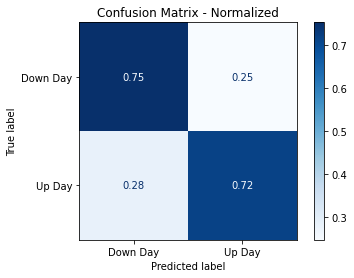

In [19]:
##----------------Detailed Report---------------##
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

rf_matrix = confusion_matrix(y_test, y_pred)

true_negatives = rf_matrix[0][0]
false_negatives = rf_matrix[1][0]
true_positives = rf_matrix[1][1]
false_positives = rf_matrix[0][1]

## Applying the general formulas 
accuracy = (true_negatives + true_positives) / (true_negatives + true_positives + false_negatives + false_positives)
percision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)
specificity = true_negatives / (true_negatives + false_positives)

print('Accuracy: {}'.format(float(accuracy)))
print('Percision: {}'.format(float(percision)))
print('Recall: {}'.format(float(recall)))
print('Specificity: {}'.format(float(specificity)))

#plotting confusion matrix using plot_confusion_matrix function in scikitlearn
disp = plot_confusion_matrix(rand_frst_clf, X_test, y_test, display_labels = ['Down Day', 'Up Day'], normalize = 'true', cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion Matrix - Normalized')
plt.show()